
  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl (625 kB)
Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl (2.8 MB)
Select an industry:
1: Information Technology
2: Industrials
3: Consumer Staples
4: Health Care
5: Materials
6: Communication Services
7: Consumer Discretionary
8: Energy
9: Utilities
10: Real Estate
11: Financials
You selected the industry: Energy
Select a company ticker from the following:
1: APA - APA Corporation
2: BKR - Baker Hughes
3: CVX - Chevron Corporation
4: COP - ConocoPhillips
5: CTRA - Coterra
6: DVN - Devon Energy
7: FANG - Diamondback Energy
8: EOG - EOG Resources
9: EQT - EQT Corporation
10: XOM - ExxonMobil
11: HAL - Halliburton
12: HES - Hess Corporation
13: KMI - Kinder Morgan
14: MRO - Marathon Oil
15: MPC - Marathon Petroleum
16: OXY - Occidental Petroleum
17: OKE - ONEOK
18: PSX - Phillips 66
19

[*********************100%***********************]  1 of 1 completed


ADF Statistic: -1.807886541367349
p-value: 0.3765533341289072
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5951.672, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5950.020, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5949.034, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5948.844, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5947.760, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5949.553, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5949.558, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5948.763, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5949.016, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5949.434, Time=1.17 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.352 seconds


c:\Users\jaosy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jaosy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


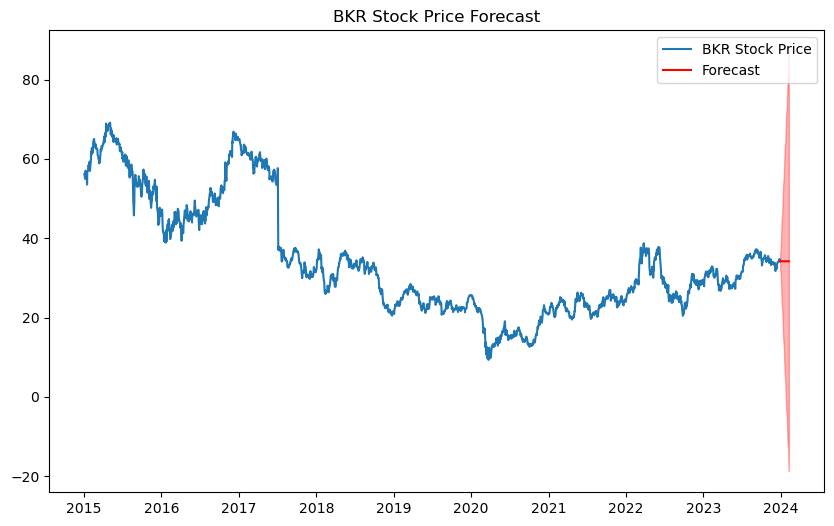

In [2]:
%pip install pmdarima 

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

# Function to fetch S&P 500 tickers and industries from Wikipedia
def get_sp500_tickers_and_industries():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = tables[0]  # The first table contains the S&P 500 data
    df = df[['Symbol', 'GICS Sector', 'Security']]  # Select relevant columns
    tickers_data = df.set_index('Symbol')[['GICS Sector', 'Security']].to_dict(orient='index')  # Create a dictionary of tickers, sectors, and company names
    return tickers_data

# Function to fetch data for a list of tickers
def get_data(tickers):
    data = {}
    for ticker in tickers:
        try:
            df = yf.download(ticker, start="2010-01-01", end="2024-10-01")
            data[ticker] = df
        except Exception as e:
            print(f"Could not retrieve data for {ticker}: {e}")
    return data

# Function to select an industry and get its tickers
def industry_selection(tickers_data):
    print("Select an industry:")
    industry_options = set(data['GICS Sector'] for data in tickers_data.values())
    for idx, industry in enumerate(industry_options):
        print(f"{idx + 1}: {industry}")

    industry_choice = int(input("Enter the number of the industry you want to select: ")) - 1
    selected_industry = list(industry_options)[industry_choice]

    print(f"You selected the industry: {selected_industry}")
    
    selected_tickers = [(ticker, data['Security']) for ticker, data in tickers_data.items() if data['GICS Sector'] == selected_industry]
    return selected_tickers

# Function to get company information using Yahoo Finance
def get_company_info(ticker, company_name):
    stock = yf.Ticker(ticker)
    info = stock.info
    address1 = info.get('address1', 'N/A')
    address2 = info.get('address2', '')
    city = info.get('city', '')
    state = info.get('state', '')
    zip_code = info.get('zip', '')
    country = info.get('country', 'N/A')
    full_address = f"{address1}, {address2} {city}, {state} {zip_code}, {country}".strip(", ")
    full_time_employees = info.get('fullTimeEmployees', 'N/A')
    company_summary = info.get('longBusinessSummary', 'N/A')
    audit_risk = info.get('auditRisk', 'N/A')
    board_risk = info.get('boardRisk', 'N/A')
    compensation_risk = info.get('compensationRisk', 'N/A')
    shareholder_rights_risk = info.get('shareHolderRightsRisk', 'N/A')
    overall_risk = info.get('overallRisk', 'N/A')

    return full_address, full_time_employees, company_summary, {
        'Audit Risk': audit_risk,
        'Board Risk': board_risk,
        'Compensation Risk': compensation_risk,
        'Shareholder Rights Risk': shareholder_rights_risk,
        'Overall Risk': overall_risk
    }

# Function to forecast stock prices using ARIMA
def forecast_stock(ticker):
    print(f"\nFetching data for {ticker}...\n")
    stock_data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

    # Augmented Dickey-Fuller test to check if time series is statonary
    result = sm.tsa.adfuller(stock_data['Close'])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    stock_diff = stock_data['Close'].diff().dropna()
    arima_model = auto_arima(stock_diff, seasonal=False, trace=True, stepwise=True)

    # Forecast 30 business days
    n_periods = 30
    forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)
    forecast_dates = pd.date_range(stock_data.index[-1], periods=n_periods, freq='B')

    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Stock Price')
    plt.plot(forecast_dates, forecast.cumsum() + stock_data['Close'].iloc[-1], label='Forecast', color='red')
    plt.fill_between(forecast_dates, 
                     conf_int[:, 0].cumsum() + stock_data['Close'].iloc[-1], 
                     conf_int[:, 1].cumsum() + stock_data['Close'].iloc[-1], 
                     color='red', alpha=0.3)
    plt.title(f'{ticker} Stock Price Forecast')
    plt.legend()
    plt.show()

# Main Execution
tickers_data = get_sp500_tickers_and_industries()
selected_tickers = industry_selection(tickers_data)

print("Select a company ticker from the following:")
for idx, (ticker, company_name) in enumerate(selected_tickers):
    print(f"{idx + 1}: {ticker} - {company_name}")

company_choice = int(input("Enter the number of the company you want to select: ")) - 1
selected_ticker, selected_company_name = selected_tickers[company_choice]

# Get and display company information
full_address, full_time_employees, company_summary, governance_risks = get_company_info(selected_ticker, selected_company_name)

print(f"\nCompany Information for {selected_company_name} ({selected_ticker}):")
print(f"Full Address: {full_address}")
print(f"Full-Time Employees: {full_time_employees}")
print(f"Company Summary: {company_summary}")
print("\nGovernance Risks:")
for key, value in governance_risks.items():
    print(f"{key}: {value}")

# Forecast the stock price of the selected company
forecast_stock(selected_ticker)

In [3]:
import yfinance as yf
import pandas as pd
import pickle
from pmdarima import auto_arima
import os

# Fetch S&P 500 tickers and industries from Wikipedia
def get_sp500_tickers_and_industries():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = tables[0]  # The first table contains the S&P 500 data
    df = df[['Symbol', 'GICS Sector', 'Security']]  # Select relevant columns
    tickers_data = df.set_index('Symbol')[['GICS Sector', 'Security']].to_dict(orient='index')  # Create a dictionary of tickers, sectors, and company names
    return tickers_data

# Train ARIMA models for all stocks and store them in a dictionary
def train_all_arima_models(tickers_data, save_path='combined_arima_models.pkl'):
    all_models = {}  # Dictionary to hold all ARIMA models

    # Loop through each ticker
    for ticker, info in tickers_data.items():
        try:
            print(f"Processing {ticker}...")
            
            # Download historical stock data
            stock_data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

            # Check if we have enough data to train the model
            if len(stock_data) < 100:  # Arbitrary threshold for sufficient data
                print(f"Skipping {ticker}: Not enough data")
                continue

            # Differencing to make the series stationary
            stock_diff = stock_data['Close'].diff().dropna()

            # Train an ARIMA model
            arima_model = auto_arima(stock_diff, seasonal=False, trace=False, stepwise=True)

            # Store the model in the dictionary
            all_models[ticker] = arima_model
            
        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    # Save the combined dictionary of models to a single file
    with open(save_path, 'wb') as f:
        pickle.dump(all_models, f)

    print(f"All models saved to {save_path}")

# Load the combined ARIMA model dictionary
def load_combined_arima_models(save_path='combined_arima_models.pkl'):
    with open(save_path, 'rb') as f:
        all_models = pickle.load(f)
    return all_models

# Main Execution
tickers_data = get_sp500_tickers_and_industries()

# Train and save all ARIMA models
train_all_arima_models(tickers_data)

# To load the models later, use:
# models = load_combined_arima_models()

Processing MMM...


[*********************100%***********************]  1 of 1 completed


Processing AOS...


[*********************100%***********************]  1 of 1 completed


Processing ABT...


[*********************100%***********************]  1 of 1 completed


Processing ABBV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ACN...


Processing ADBE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMD']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing AMD...
Skipping AMD: Not enough data
Processing AES...


[*********************100%***********************]  1 of 1 completed


Processing AFL...


[*********************100%***********************]  1 of 1 completed


Processing A...


[*********************100%***********************]  1 of 1 completed


Processing APD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ABNB...


Processing AKAM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ALB...



[*********************100%***********************]  1 of 1 completed

Processing ARE...



[*********************100%***********************]  1 of 1 completed

Processing ALGN...



[*********************100%***********************]  1 of 1 completed

Processing ALLE...



[*********************100%***********************]  1 of 1 completed

Processing LNT...



[*********************100%***********************]  1 of 1 completed

Processing ALL...



[*********************100%***********************]  1 of 1 completed

Processing GOOGL...



[*********************100%***********************]  1 of 1 completed

Processing GOOG...


Processing MO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AMZN...



[*********************100%***********************]  1 of 1 completed

Processing AMCR...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMTM']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing AMTM...
Skipping AMTM: Not enough data
Processing AEE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AEP...



[*********************100%***********************]  1 of 1 completed

Processing AXP...



[*********************100%***********************]  1 of 1 completed

Processing AIG...


Processing AMT...


[*********************100%***********************]  1 of 1 completed


Processing AWK...


[*********************100%***********************]  1 of 1 completed


Processing AMP...


[*********************100%***********************]  1 of 1 completed


Processing AME...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AMGN...



[*********************100%***********************]  1 of 1 completed

Processing APH...



[*********************100%***********************]  1 of 1 completed

Processing ADI...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANSS']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing ANSS...
Skipping ANSS: Not enough data
Processing AON...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing APA...


Processing AAPL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AMAT...


Processing APTV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ACGL...


Processing ADM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ANET...


Processing AJG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AIZ...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['T']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing T...
Skipping T: Not enough data
Processing ATO...


[*********************100%***********************]  1 of 1 completed


Processing ADSK...


[*********************100%***********************]  1 of 1 completed


Processing ADP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AZO...


Processing AVB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AVY...



[*********************100%***********************]  1 of 1 completed

Processing AXON...



[*********************100%***********************]  1 of 1 completed

Processing BKR...



[*********************100%***********************]  1 of 1 completed

Processing BALL...



[*********************100%***********************]  1 of 1 completed

Processing BAC...


Processing BAX...


[*********************100%***********************]  1 of 1 completed


Processing BDX...


[*********************100%***********************]  1 of 1 completed


Processing BRK.B...


Failed to get ticker 'BRK.B' reason: HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Skipping BRK.B: Not enough data
Processing BBY...


[*********************100%***********************]  1 of 1 completed


Processing TECH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing BIIB...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BLK']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing BLK...
Skipping BLK: Not enough data
Processing BX...


[*********************100%***********************]  1 of 1 completed


Processing BK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing BA...



[*********************100%***********************]  1 of 1 completed

Processing BKNG...



[*********************100%***********************]  1 of 1 completed

Processing BWA...



[*********************100%***********************]  1 of 1 completed

Processing BSX...


Processing BMY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AVGO...



[*********************100%***********************]  1 of 1 completed

Processing BR...


Processing BRO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2024-01-01)')
[*********************100%***********************]  1 of 1 completed

Processing BF.B...
Skipping BF.B: Not enough data
Processing BLDR...



[*********************100%***********************]  1 of 1 completed

Processing BG...



[*********************100%***********************]  1 of 1 completed

Processing BXP...


Processing CHRW...


[*********************100%***********************]  1 of 1 completed


Processing CDNS...


[*********************100%***********************]  1 of 1 completed
